In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
column_mapping = {
                  1.1: 'EVExp', 
                  # Socio-Demographics
                  0.1: 'Age', 
                  9.1: 'Gender',
                  9.2: 'Race',
                  9.3: 'Ethnic',
                  9.4: 'Education',
                  9.5: 'Occupation',
                  9.6: 'Income',
                  9.7: 'Household_Num',
                  9.8: 'Residence',
                  9.9: 'Moving_Plan',
                  '9.1.1': 'ZIP_Home',
                  9.11: 'ZIP_Main',
                  9.12: 'Indiana_Living_Years',
                  9.13: 'Political_Leaning1',
                  '9.N14': 'Political_Leaning2',
                  9.15: 'Political_Leaning3',
    
                  'A1.3': 'EVBrand',
                  'A2.0': 'Num_EV_Household',
                  2.1: 'Num_Non-EV_Household',
                  'A2.3_1': 'Work_Mode',
                  'A2.3_2': 'Shopping_Mode',
                  'A2.3_3': 'Personal_Mode',
                  'A2.3_4': 'Social_Mode',
                  'A2.3_5': 'Recreational_Mode',
                  'BC2.3_1': 'Work_Mode_non',
                  'BC2.3_2': 'Shopping_Mode_non',
                  'BC2.3_3': 'Personal_Mode_non',
                  'BC2.3_4': 'Social_Mode_non',
                  'BC2.3_5': 'Recreational_Mode_non',
                  6.4: 'Charging_Tech',
                  'A6.0': 'Home_Charging_Avail',
                  'A6.1': 'Charge_EV_Loc',
                  'BC6.1': 'Charge_EV_Loc_non',
                  6.2: 'Max_Drive',
                  '6.3_1': 'Office_Will',
                  '6.3_2': 'Retail_Will',
                  '6.3_3': 'PubAdmin_Will',
                  '6.3_4': 'Medical_Will',
                  '6.3_5': 'Educational_Will',
                  '6.3_6': 'Leisure_Will',
                  '6.3_7': 'Transit_Will',
                  '6.3_8': 'Hotel_Will',
                  '6.3_9': 'Restaurant_Will',
                  'A6.5': 'Battery_Level_Out',
                  'A6.6': 'Battery_Level_Charge',
                  'A6.7': 'Charge_Time',
                  'A6.8_1': 'Level1_Duration',
                  'A6.8_2': 'Level2_Duration',
                  'A6.8_3': 'Level3_Duration',
                  'A6.9': 'Walk_Will_Exp',
                  'A6.10': 'Battery_Equal_Start',
                  'A6.11': 'Battery_High_Unfam',
                  'BC6.5': 'Walk_Will_No-Exp',
                  'BC6.6': 'Battery_Equal_Start_non',
                  'BC6.7': 'Battery_High_Unfam_non',
                  'A7.1': 'Reliable_to_Charge',
                  'BC7.1': 'Reliable_to_Charge_non',
                  7.2: 'PubChar_Max_Dist',
    
                  4.2: 'INCTV',
    
                  '5.1_1': 'EvWill01',
                  '5.1_2': 'EvWill02',
                  '5.1_3': 'EvWill03',
                  '5.1_4': 'EvWill04',
                  '5.1_5': 'EvWill05',
                  '5.1_6': 'EvWill06',
    
                  '7.3_1': 'Pub01', 
                  '7.3_2': 'Pub02', 
                  '7.3_3': 'Pub03', 
                  '7.3_4': 'Pub04', 
                  '7.3_5': 'Pub05', 
                  '7.3_6': 'Pub06'
                 }

agree_mapping1 = {
                'Strongly disagree': 1,
                'Disagree': 2,
                'Neither agree nor disagree': 3,
                'Agree': 4,
                'Strongly agree': 5
                }

agree_mapping2 = {
                'Strongly disagree': 5,
                'Disagree': 4,
                'Neither agree nor disagree': 3,
                'Agree': 2,
                'Strongly agree': 1
                }

likely_mapping = {
                 'Very Unlikely': 1,
                 'Unlikely': 2,
                 'Neutral': 3,
                 'Likely': 4,
                 'Very likely': 5
                 }
frequency_mapping = {
                    'Never': 1,
                    'Sometimes': 2,
                    'Rarely': 2,
                    'About half of time': 3,
                    'Sometimes': 3,
                    'Most of the time': 4,
                    'Often': 4,
                    'Always': 5
                    }
advantage_mapping = {
                    "Don't know / not sure": -1,
                    'Major Disadvantage': 1,
                    'Disadvantage': 2,
                    'Neither': 3,
                    'Advantage': 4,
                    'Major Advantage': 5
                    }

age_mapping = {
               'Under 18': 1, 
               '18-24': 2, 
               '25-34': 3,
               '35-44': 4,
               '45-54': 5,
               '55-64': 6,
               'Over 65': 7
              }

income_mapping = {
                 'I prefer not to say': 0,
                 'Under $25,000': 1,
                 '$25,000 - $49,999': 2,
                 '$50,000 - $74,999': 3,
                 '$75,000 - $99,999': 4,
                 '$100,000 - $149,999': 5,
                 '$150,000 or more': 6
                 }

education_mapping = {
                    'Grade school or less': 1,
                    'Some high school': 2,
                    'High school graduate': 3,
                    'Technical training beyond high school': 4,
                    'Some college': 5,
                    'College graduate': 6,
                    'Graduate or professional school': 7,
                    }
household_number_mapping = {'4 or more': 4,
                            '8 or more': 8}
living_years_mapping = {'more than 10 years': 4
                        ,'5 to 10 years': 3
                        ,'2 to 5 years': 2
                        ,'0 to 2 years': 1}
mode_mapping = {'Ride-hailing (Ex: Uber, Lyftâ€¦)': 'Ride-hailing'
               ,'N/A (I am not travelling for this purpose)': 'N/A'}
charging_tech_mapping = {'Alternating Current (AC): Level 1 - Slow charger': 'Level 1', 
                         'Alternating Current (AC): Level 2 - Slow charger':'Level 2', 
                         'Direct Current Fast Charging (DCFC): Level 3 - Fast charger': 'DCFC',
                         'Dynamic Wireless Power Transfer: DWPT (i.e., EVs can recharge while driving on designated lanes)': 'DWPT',
                         'Battery swapping': 'Battery Swapping',
                         'None of the above': 'None Above'}
moving_plan_mapping = {'Definitely not': 1
                       ,'Probably not': 2
                       ,'Might or might not': 3
                       ,'Definitely yes': 4
                       ,'Probably yes': 5}
charging_loc_mapping = { 'Home charging stations (Level 1)': 'Level 1'
                         , 'Public charging stations (Level 2)': 'Level 2'
                         ,'Public charging stations (DCFC)': 'DCFC'
                         ,'Home charging stations (Level 1),Public charging stations (Level 2)': 'Level 2 & Level 1'
                         ,'Home charging stations (Level 1),Public charging stations (Level 2),Public charging stations (DCFC)': 'DCFC & Level 2 & Level 1'
                         ,'Public charging stations (Level 2),Public charging stations (DCFC)': 'DCFC & Level 2'
                         ,'Home charging stations (Level 1),Public charging stations (DCFC)': 'DCFC & Level 1'}
time_mapping = {'0 - 3 minutes': 1
                ,'3 - 7 minutes': 2
                ,'7 - 10 minutes': 3
                ,'More than 10 minutes': 4}
distance_mapping = { 
                    '0 miles (home charging)': 1
                    ,'0.1 - 2 miles': 2
                    ,'2.1 - 5 miles': 3
                    ,'5.1 - 10 miles': 4
                    ,'more than 10 miles': 5

                    ,'10 miles': 1
                    ,'30 miles': 2
                    ,'50 miles': 3
                    ,'100 miles': 4
                    ,'More than 100 miles': 5}
binary_mapping = {'Yes': 1
                 ,'No': 0}

duration_mapping = {'0 â€“ 14.9 minutes': '0 - 14.9 minutes'
                   ,'15.0 â€“ 29.9 minutes': '15 - 29.9 minutes'
                   ,'30.0 â€“ 59.9 minutes': '30 - 59.9 minutes'
                   ,'1h â€“ 3 hours': '1 - 3 hours'
                   ,'More than 3 hours': 'More than 3 hours'
                   ,"I don't charge here": "I don't charge here"
                   ,"I don't know": "I don't know"
                   }

In [3]:
# df = pd.read_csv(r"C:\Users\kenny\OneDrive - purdue.edu\Documents\Kenny's File\Transportation Literature\Fall 2023\SPR 4706 - EV Public Perception Expectation and WTP\SPR 4706\res_dyneventh_apollo.csv")
data_df = pd.read_excel(r"C:\Users\kenny\Box\SPR 4706 Survey Data\SPR 4706 - Dynata and EV enthusiasts.xlsx")

In [4]:
charging_data = data_df.iloc[2:2671, np.concatenate(([8], [21], np.arange(100,136)))]

In [5]:
charging_data.columns.values

array(['ResponseId', 1.1, 6.4, 'A6.0', 'A6.1', 'BC6.1', 6.2, '6.3_1',
       '6.3_2', '6.3_3', '6.3_4', '6.3_5', '6.3_6', '6.3_7', '6.3_8',
       '6.3_9', 'A6.5', 'A6.6', 'A6.7', 'A6.8_1', 'A6.8_2', 'A6.8_3',
       'A6.9', 'A6.10', 'A6.11', 'BC6.5', 'BC6.6', 'BC6.7', 'VER Q2.',
       'A7.1', 'BC7.1', 7.2, '7.3_1', '7.3_2', '7.3_3', '7.3_4', '7.3_5',
       '7.3_6'], dtype=object)

In [6]:
for column in charging_data.columns:
    unique_values = charging_data[column].unique()
    print(f'Column: {column}, Unique Values: {unique_values}')

Column: ResponseId, Unique Values: ['R_3EulwPYBK6WyfZa' 'R_3k5RTyT3hCAEE6j' 'R_TgOIylYPKFT9V2p' ...
 'R_yt2vtknC49HuvCN' 'R_9MGcKB8lLSUZxAJ' 'R_3PNAO7s2sjetOjN']
Column: 1.1, Unique Values: [nan 'I currently own an EV' 'I have never owned or leased an EV'
 'I owned an EV in the past, but I do not have access to an EV anymore'
 'I currently lease an EV' 'I leased an EV in the past and now I own one'
 'I owned an EV in the past and now I lease one'
 'I leased an EV in the past, but I do not have access to an EV anymore']
Column: 6.4, Unique Values: [nan 'Direct Current Fast Charging (DCFC): Level 3 - Fast charger'
 'Alternating Current (AC): Level 2 - Slow charger'
 'Dynamic Wireless Power Transfer: DWPT (i.e., EVs can recharge while driving on designated lanes)'
 'None of the above'
 'Alternating Current (AC): Level 1 - Slow charger,Alternating Current (AC): Level 2 - Slow charger'
 'Battery swapping'
 'Alternating Current (AC): Level 1 - Slow charger,Alternating Current (AC): Level 2 -

In [7]:
# rename column
charging_data.rename(columns = column_mapping, inplace = True)

charging_data['EVExp'] = charging_data['EVExp'].apply(lambda x: 'No EV Experience' if x == 'I have never owned or leased an EV' else 'Have EV Experience')

charging_data['Charge_EV_Loc'] = charging_data['Charge_EV_Loc'].map(charging_loc_mapping)
charging_data['Charge_EV_Loc_non'] = charging_data['Charge_EV_Loc_non'].map(charging_loc_mapping)

charging_data['Level1_Duration'] = charging_data['Level1_Duration'].map(duration_mapping)
charging_data['Level2_Duration'] = charging_data['Level2_Duration'].map(duration_mapping)
charging_data['Level3_Duration'] = charging_data['Level3_Duration'].map(duration_mapping)

In [8]:
charging_data.columns.values

array(['ResponseId', 'EVExp', 'Charging_Tech', 'Home_Charging_Avail',
       'Charge_EV_Loc', 'Charge_EV_Loc_non', 'Max_Drive', 'Office_Will',
       'Retail_Will', 'PubAdmin_Will', 'Medical_Will', 'Educational_Will',
       'Leisure_Will', 'Transit_Will', 'Hotel_Will', 'Restaurant_Will',
       'Battery_Level_Out', 'Battery_Level_Charge', 'Charge_Time',
       'Level1_Duration', 'Level2_Duration', 'Level3_Duration',
       'Walk_Will_Exp', 'Battery_Equal_Start', 'Battery_High_Unfam',
       'Walk_Will_No-Exp', 'Battery_Equal_Start_non',
       'Battery_High_Unfam_non', 'VER Q2.', 'Reliable_to_Charge',
       'Reliable_to_Charge_non', 'PubChar_Max_Dist', 'Pub01', 'Pub02',
       'Pub03', 'Pub04', 'Pub05', 'Pub06'], dtype=object)

In [9]:
charging_data.shape

(2669, 38)

In [10]:
for column in charging_data.columns:
    unique_values = charging_data[column].unique()
    print(f'Column: {column}, Unique Values: {unique_values}')

Column: ResponseId, Unique Values: ['R_3EulwPYBK6WyfZa' 'R_3k5RTyT3hCAEE6j' 'R_TgOIylYPKFT9V2p' ...
 'R_yt2vtknC49HuvCN' 'R_9MGcKB8lLSUZxAJ' 'R_3PNAO7s2sjetOjN']
Column: EVExp, Unique Values: ['Have EV Experience' 'No EV Experience']
Column: Charging_Tech, Unique Values: [nan 'Direct Current Fast Charging (DCFC): Level 3 - Fast charger'
 'Alternating Current (AC): Level 2 - Slow charger'
 'Dynamic Wireless Power Transfer: DWPT (i.e., EVs can recharge while driving on designated lanes)'
 'None of the above'
 'Alternating Current (AC): Level 1 - Slow charger,Alternating Current (AC): Level 2 - Slow charger'
 'Battery swapping'
 'Alternating Current (AC): Level 1 - Slow charger,Alternating Current (AC): Level 2 - Slow charger,Direct Current Fast Charging (DCFC): Level 3 - Fast charger,Dynamic Wireless Power Transfer: DWPT (i.e., EVs can recharge while driving on designated lanes),Battery swapping'
 'Direct Current Fast Charging (DCFC): Level 3 - Fast charger,Dynamic Wireless Power Transfe

Home_Charging_Avail  No  Yes
EVExp                       
Have EV Experience   78  216


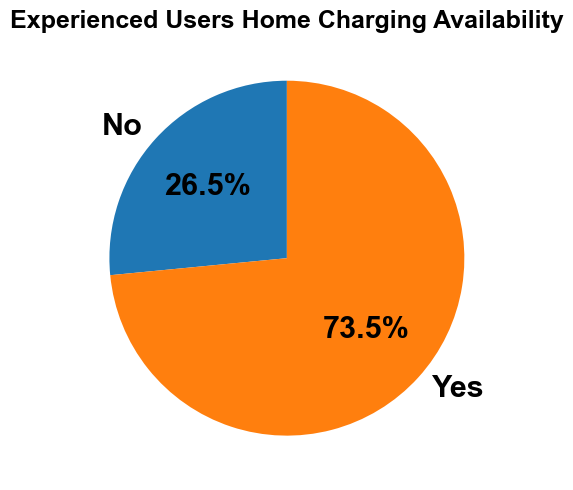

In [41]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Home_Charging_Avail']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']
# values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title('Experienced Users Home Charging Availability', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Plot for 'No EV Experience'
# axes[1].pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold'}, startangle=90)
# axes[1].set_title('No EV Experience Charging Preference', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'calibri'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Experienced Users Home Charging.png",
           dpi = 900)

Charge_EV_Loc       DCFC  DCFC & Level 1  DCFC & Level 2  \
EVExp                                                      
Have EV Experience    20              18              25   

Charge_EV_Loc       DCFC & Level 2 & Level 1  Level 1  Level 2  \
EVExp                                                            
Have EV Experience                        58       72       59   

Charge_EV_Loc       Level 2 & Level 1  
EVExp                                  
Have EV Experience                 45  


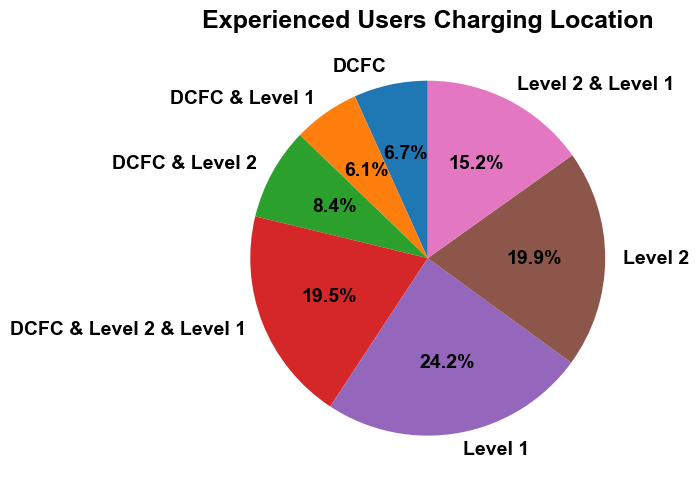

In [42]:
plot_df = charging_data.groupby(['EVExp', 'Charge_EV_Loc']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']
# values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title('Experienced Users Charging Location', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Experienced Users Charging Loc.png",
           dpi = 900)

Charge_EV_Loc_non   DCFC  DCFC & Level 1  DCFC & Level 2  \
EVExp                                                      
Have EV Experience     8               6               3   
No EV Experience     215             145             101   

Charge_EV_Loc_non   DCFC & Level 2 & Level 1  Level 1  Level 2  \
EVExp                                                            
Have EV Experience                        10       11       10   
No EV Experience                         290      542      255   

Charge_EV_Loc_non   Level 2 & Level 1  
EVExp                                  
Have EV Experience                  9  
No EV Experience                  142  


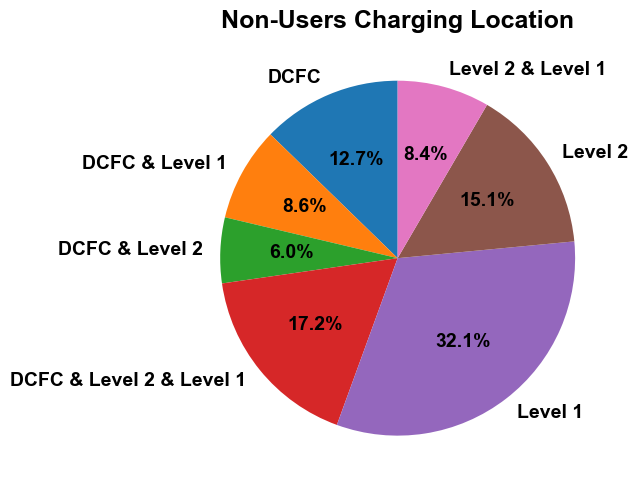

In [43]:
plot_df = charging_data.groupby(['EVExp', 'Charge_EV_Loc_non']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title('Non-Users Charging Location', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Non-Users Charging Loc.png",
           dpi = 900)

Max_Drive           0 miles (home charging)  0.1 - 2 miles  2.1 - 5 miles  \
EVExp                                                                       
Have EV Experience                       50             42            118   
No EV Experience                        445            269            438   

Max_Drive           5.1 - 10 miles  more than 10 miles  
EVExp                                                   
Have EV Experience              89                  55  
No EV Experience               288                 250  


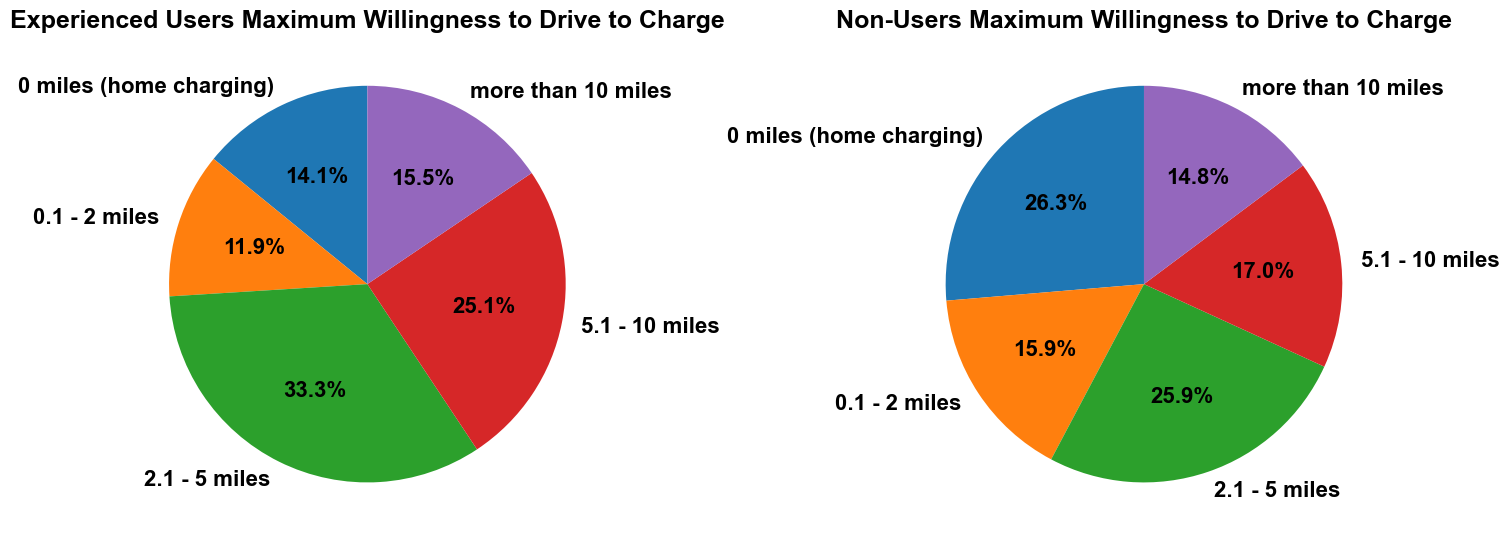

In [44]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Max_Drive']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot for 'Have EV Experience'
axes[0].pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[0].set_title('Experienced Users Maximum Willingness to Drive to Charge', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Plot for 'No EV Experience'
axes[1].pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[1].set_title('Non-Users Maximum Willingness to Drive to Charge', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\EV Experience vs Max Drive.png",
           dpi = 900)

Office_Will         Always  Never  Often  Rarely  Sometimes
EVExp                                                      
Have EV Experience      98     37     93      40         86
No EV Experience       273    520    394     123        380


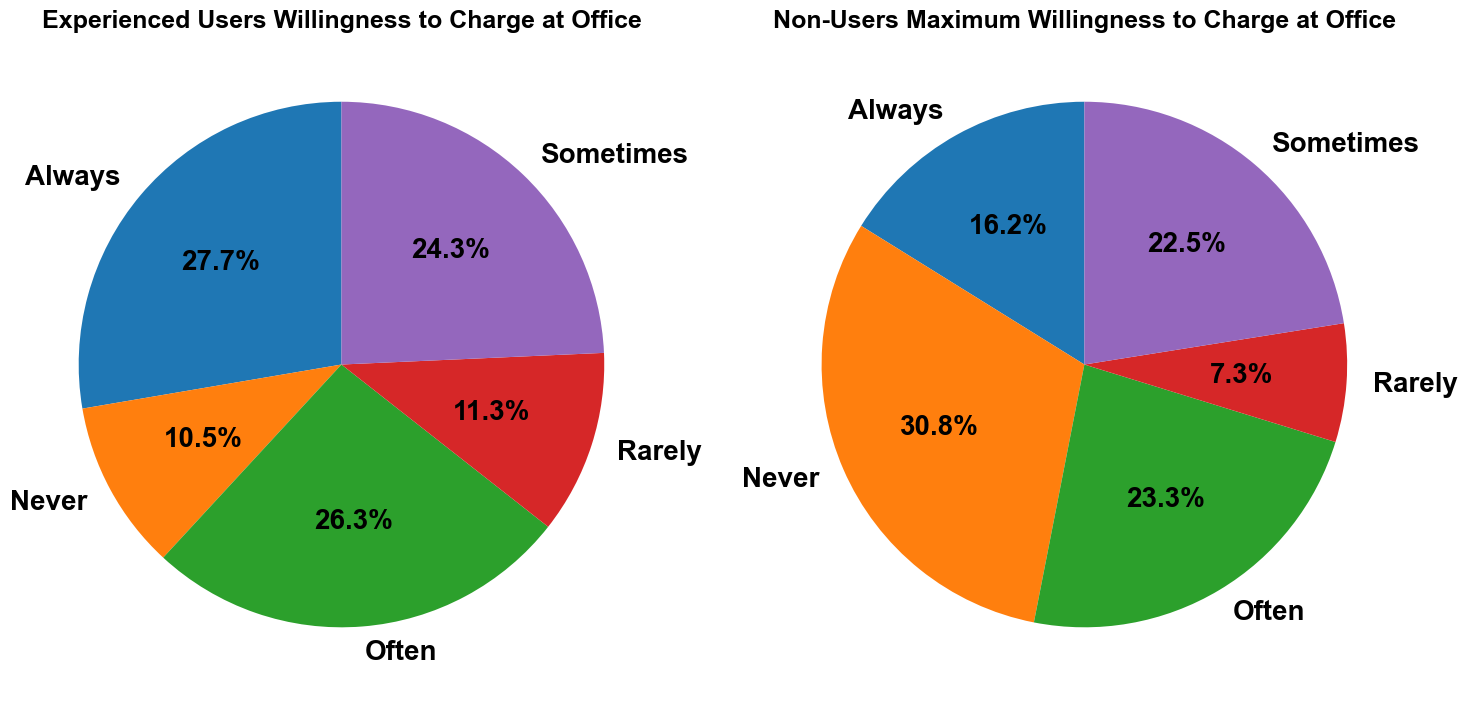

In [45]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Office_Will']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot for 'Have EV Experience'
axes[0].pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[0].set_title('Experienced Users Willingness to Charge at Office', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Plot for 'No EV Experience'
axes[1].pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[1].set_title('Non-Users Maximum Willingness to Charge at Office', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\EV Experience vs Office Will.png",
           dpi = 900)

Retail_Will         Always  Never  Often  Rarely  Sometimes
EVExp                                                      
Have EV Experience      58     15    105      55        121
No EV Experience       162    287    341     265        635


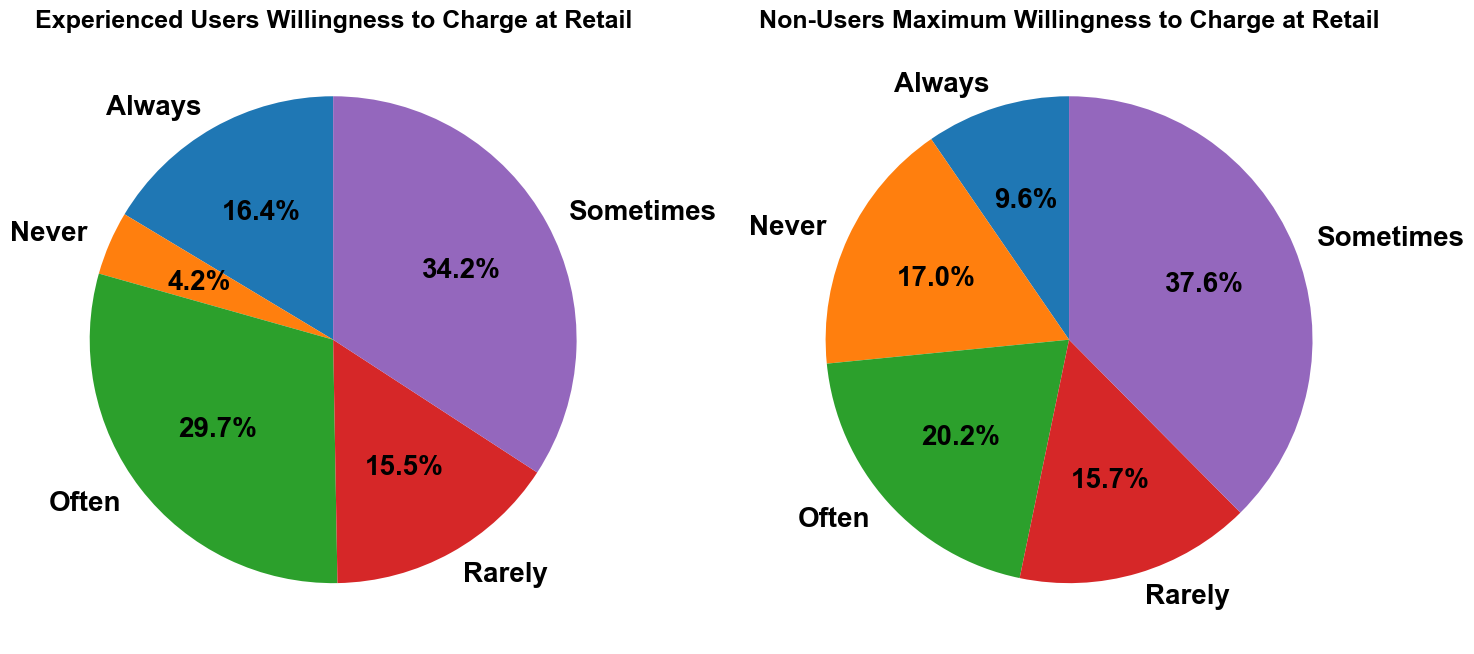

In [46]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Retail_Will']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot for 'Have EV Experience'
axes[0].pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[0].set_title('Experienced Users Willingness to Charge at Retail', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Plot for 'No EV Experience'
axes[1].pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[1].set_title('Non-Users Maximum Willingness to Charge at Retail', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\EV Experience vs Retail Will.png",
           dpi = 900)

PubAdmin_Will       Always  Never  Often  Rarely  Sometimes
EVExp                                                      
Have EV Experience      54     36     75      75        114
No EV Experience       131    415    230     374        540


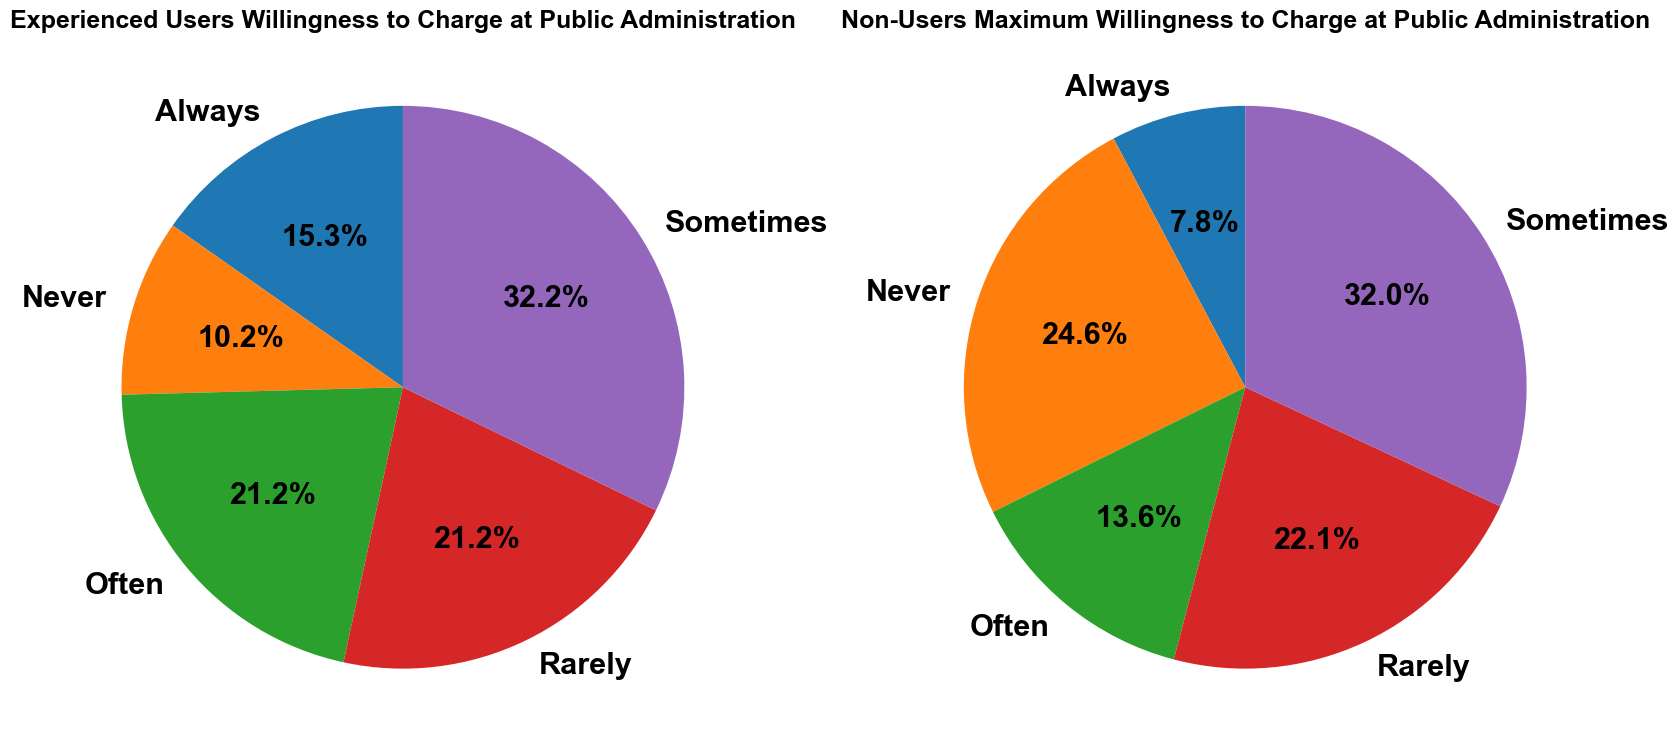

In [47]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'PubAdmin_Will']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 10))

# Plot for 'Have EV Experience'
axes[0].pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[0].set_title('Experienced Users Willingness to Charge at Public Administration', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Plot for 'No EV Experience'
axes[1].pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[1].set_title('Non-Users Maximum Willingness to Charge at Public Administration', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\EV Experience vs PubAdmin Will.png",
           dpi = 900)

Medical_Will        Always  Never  Often  Rarely  Sometimes
EVExp                                                      
Have EV Experience      50     23     82      71        128
No EV Experience       149    338    248     341        614


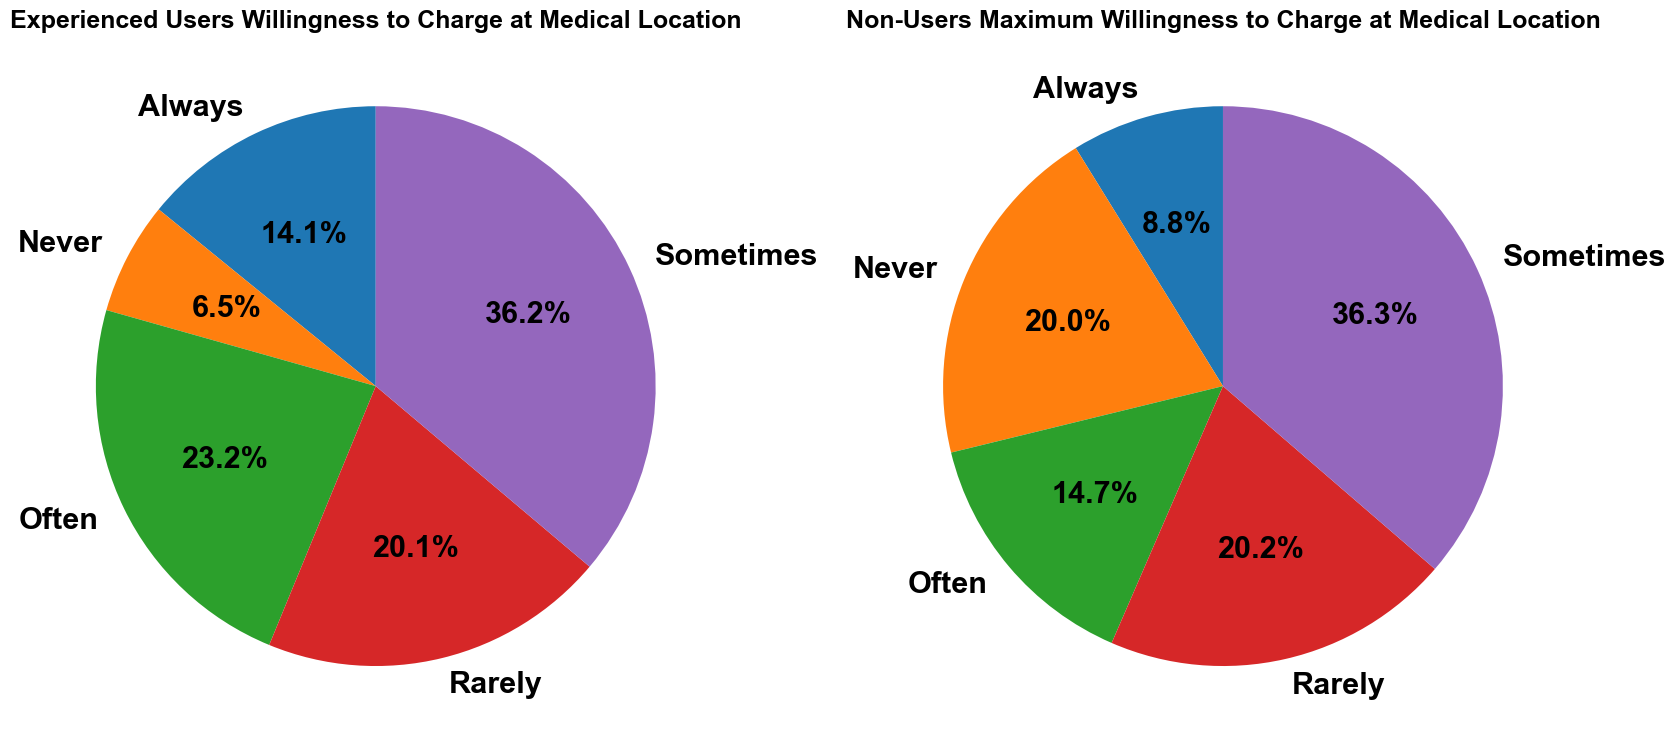

In [48]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Medical_Will']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 10))

# Plot for 'Have EV Experience'
axes[0].pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[0].set_title('Experienced Users Willingness to Charge at Medical Location', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Plot for 'No EV Experience'
axes[1].pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[1].set_title('Non-Users Maximum Willingness to Charge at Medical Location', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\EV Experience vs Medical Will.png",
           dpi = 900)

Educational_Will    Always  Never  Often  Rarely  Sometimes
EVExp                                                      
Have EV Experience      61     37     86      63        107
No EV Experience       146    525    243     290        486


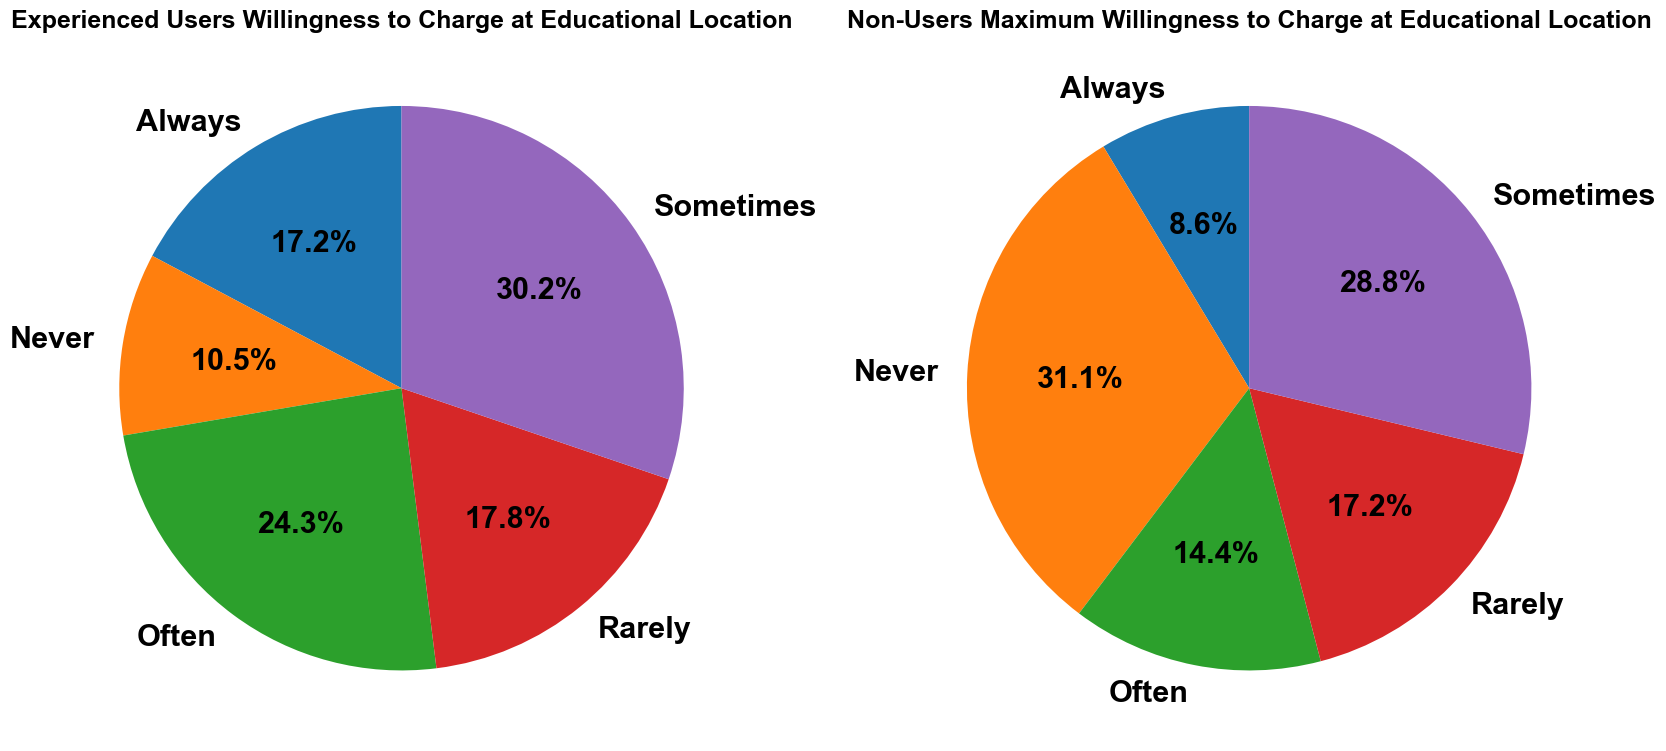

In [49]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Educational_Will']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 10))

# Plot for 'Have EV Experience'
axes[0].pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[0].set_title('Experienced Users Willingness to Charge at Educational Location', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Plot for 'No EV Experience'
axes[1].pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[1].set_title('Non-Users Maximum Willingness to Charge at Educational Location', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\EV Experience vs Educational Will.png",
           dpi = 900)

Leisure_Will        Always  Never  Often  Rarely  Sometimes
EVExp                                                      
Have EV Experience      75     20    104      40        115
No EV Experience       210    282    394     183        621


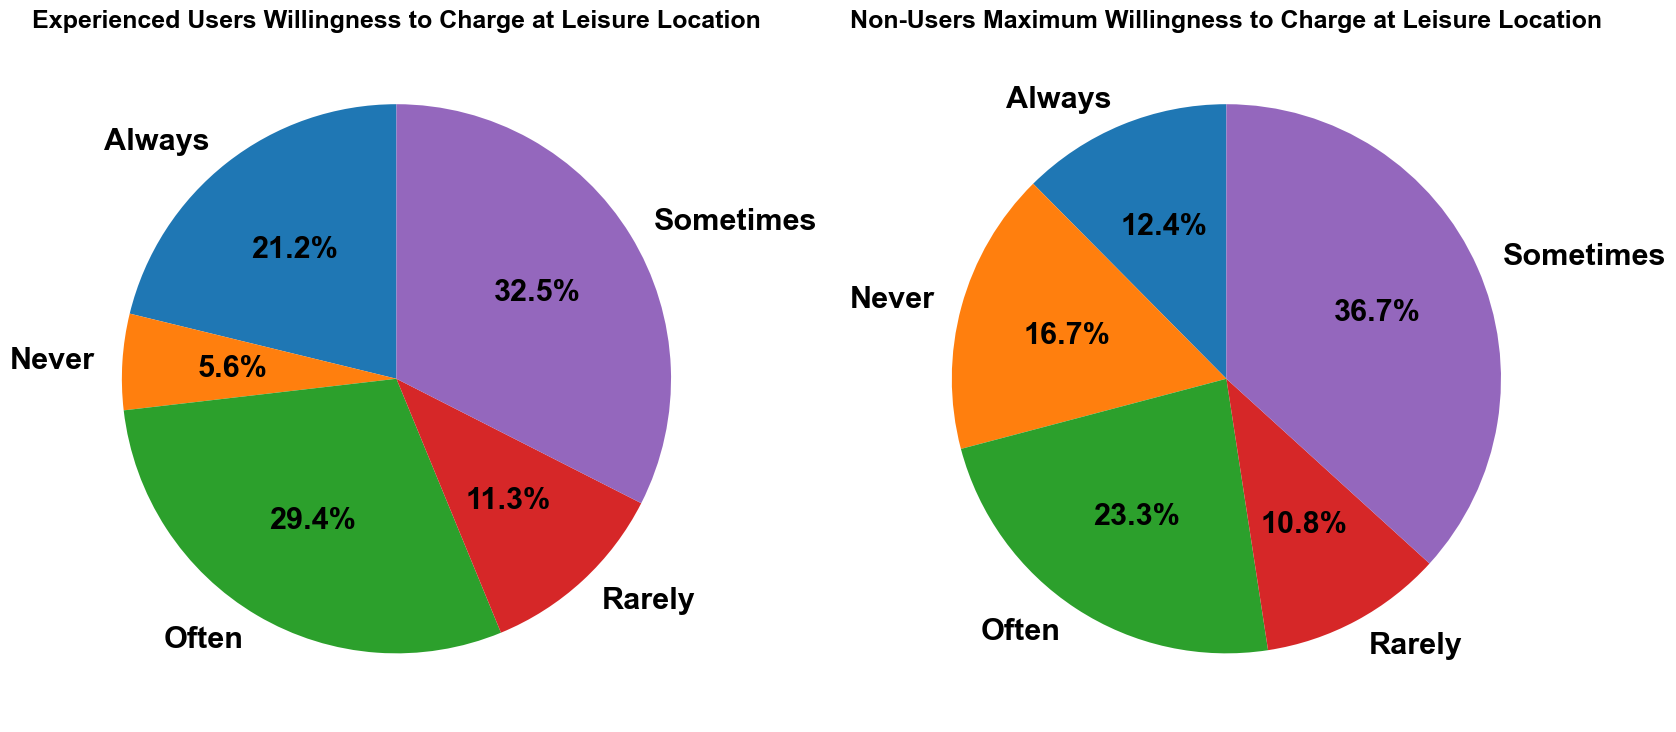

In [50]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Leisure_Will']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 10))

# Plot for 'Have EV Experience'
axes[0].pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[0].set_title('Experienced Users Willingness to Charge at Leisure Location', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Plot for 'No EV Experience'
axes[1].pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[1].set_title('Non-Users Maximum Willingness to Charge at Leisure Location', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\EV Experience vs Leisure Will.png",
           dpi = 900)

Transit_Will        Always  Never  Often  Rarely  Sometimes
EVExp                                                      
Have EV Experience      63     25     88      53        125
No EV Experience       161    423    255     283        568


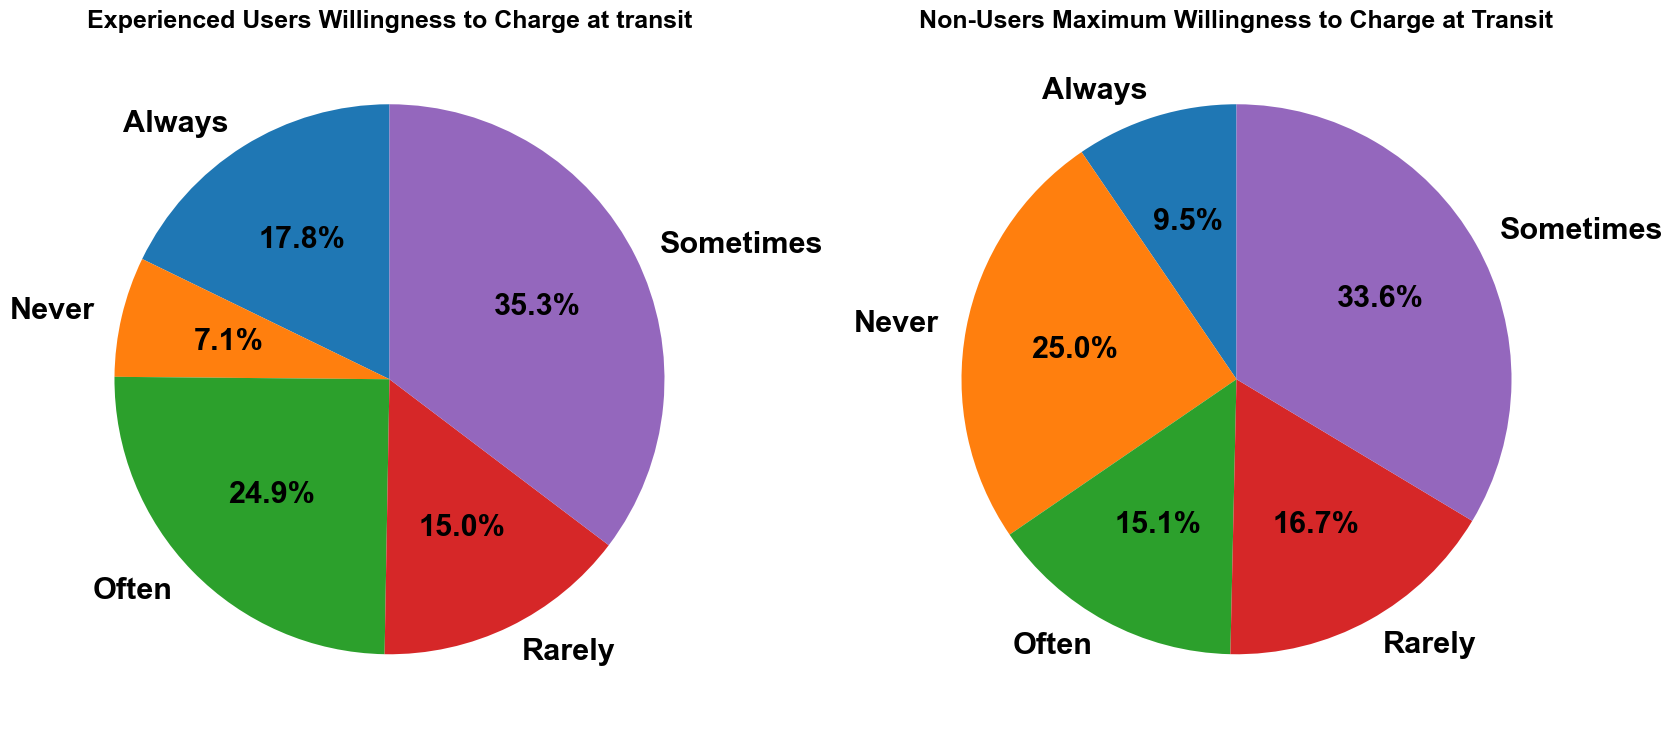

In [51]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Transit_Will']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 10))

# Plot for 'Have EV Experience'
axes[0].pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[0].set_title('Experienced Users Willingness to Charge at transit', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Plot for 'No EV Experience'
axes[1].pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[1].set_title('Non-Users Maximum Willingness to Charge at Transit', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\EV Experience vs Transit Will.png",
           dpi = 900)

Medical_Will        Always  Never  Often  Rarely  Sometimes
EVExp                                                      
Have EV Experience      50     23     82      71        128
No EV Experience       149    338    248     341        614


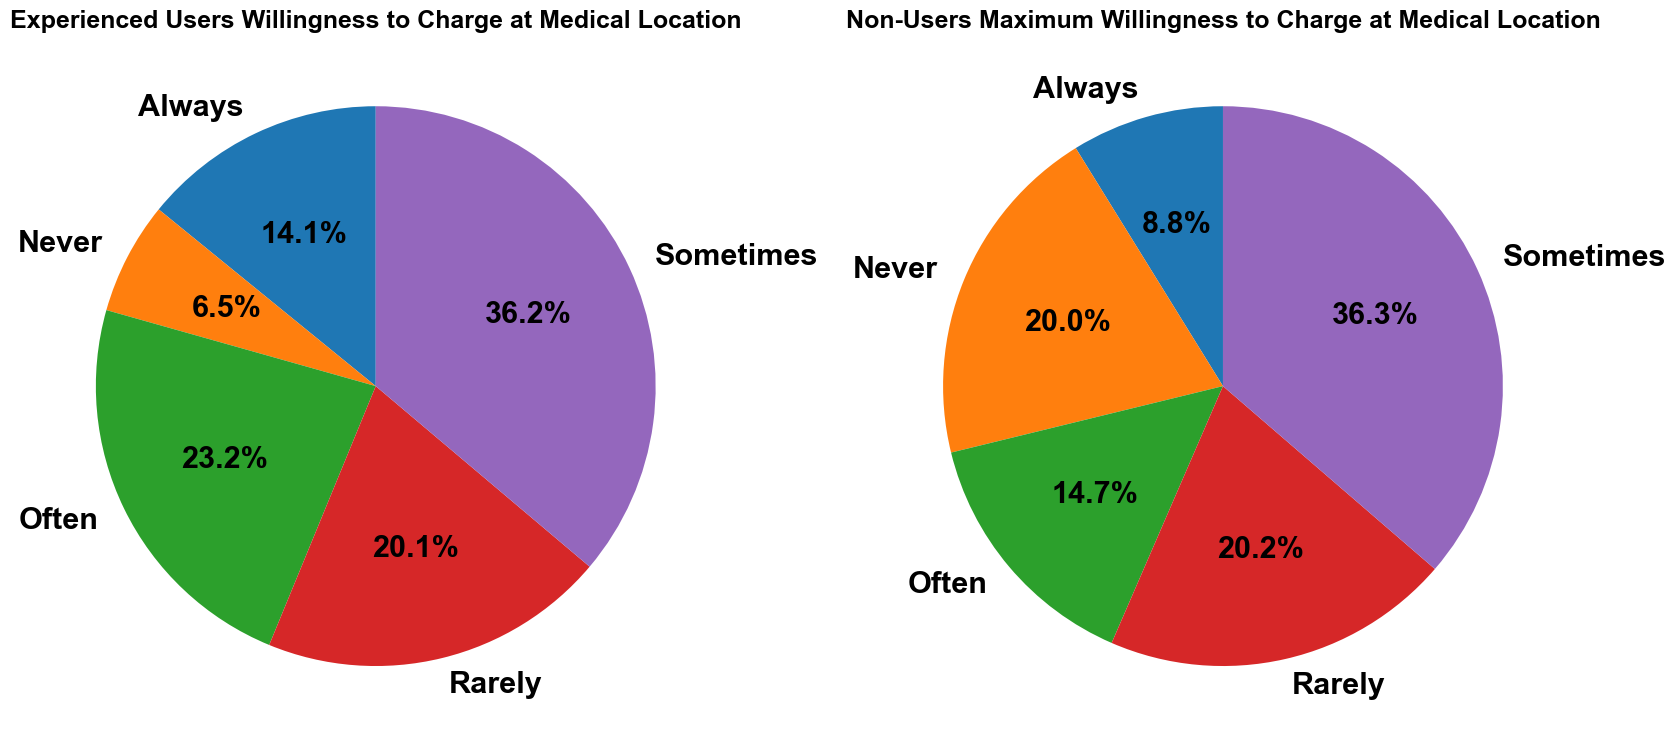

In [52]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Medical_Will']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 10))

# Plot for 'Have EV Experience'
axes[0].pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[0].set_title('Experienced Users Willingness to Charge at Medical Location', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Plot for 'No EV Experience'
axes[1].pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[1].set_title('Non-Users Maximum Willingness to Charge at Medical Location', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\EV Experience vs Medical Will.png",
           dpi = 900)

Hotel_Will          Always  Never  Often  Rarely  Sometimes
EVExp                                                      
Have EV Experience      98     13    109      37         97
No EV Experience       253    315    348     231        543


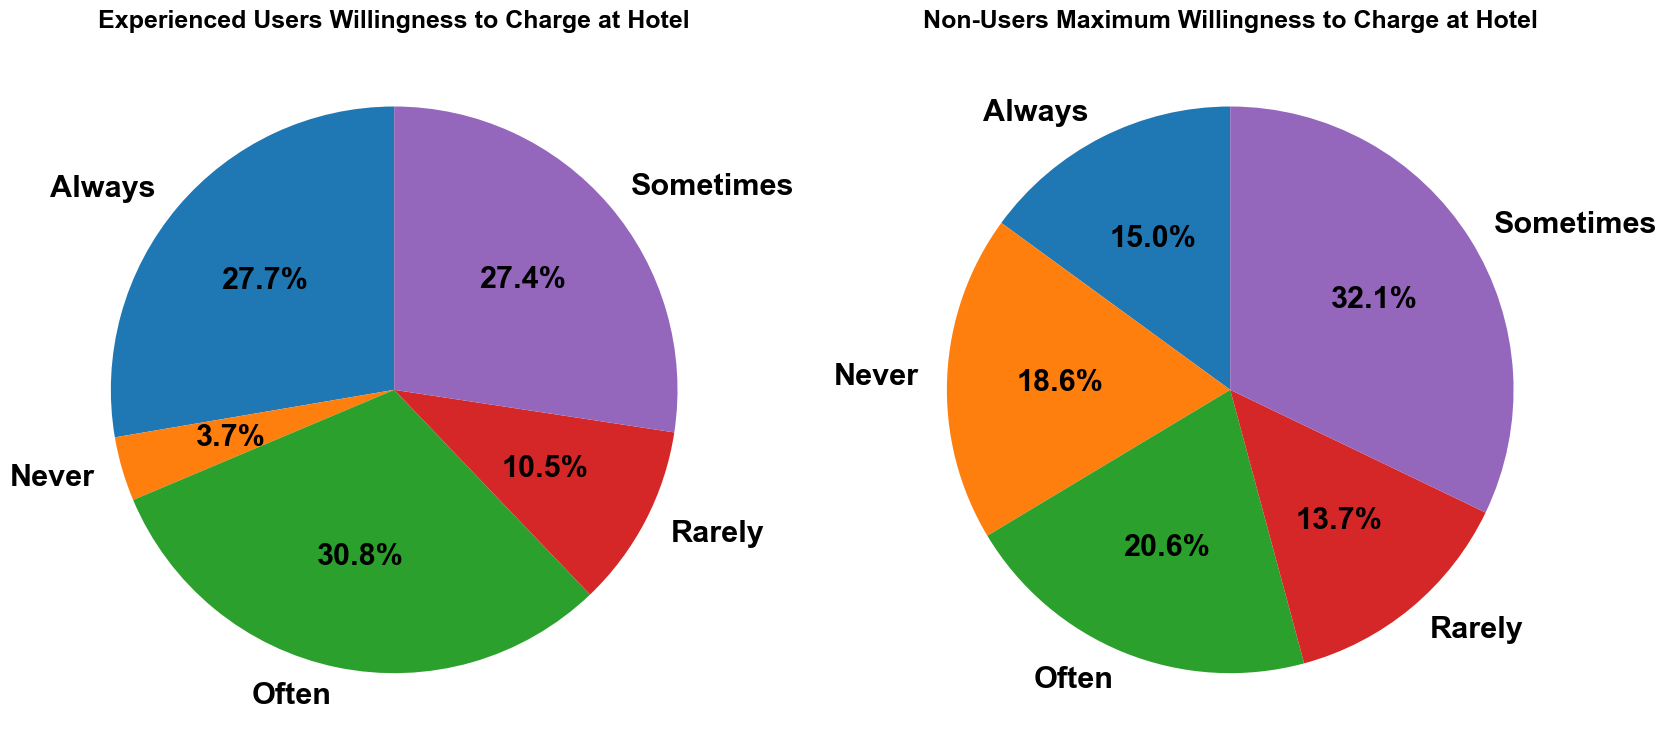

In [53]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Hotel_Will']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 10))

# Plot for 'Have EV Experience'
axes[0].pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[0].set_title('Experienced Users Willingness to Charge at Hotel', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Plot for 'No EV Experience'
axes[1].pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[1].set_title('Non-Users Maximum Willingness to Charge at Hotel', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\EV Experience vs Hotel Will.png",
           dpi = 900)

Restaurant_Will     Always  Never  Often  Rarely  Sometimes
EVExp                                                      
Have EV Experience      68     23     99      48        116
No EV Experience       183    302    301     256        648


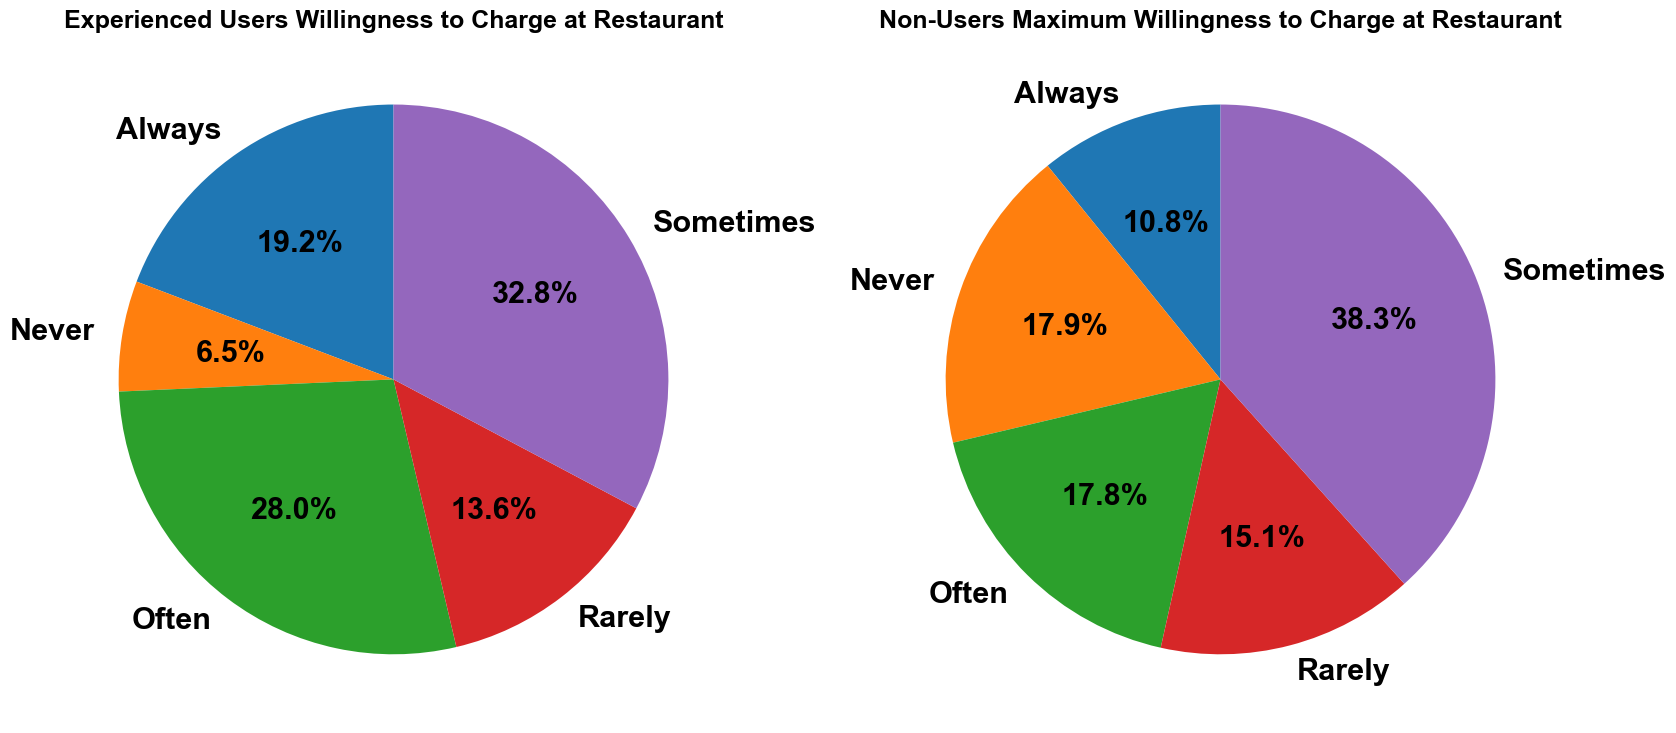

In [54]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Restaurant_Will']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 10))

# Plot for 'Have EV Experience'
axes[0].pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[0].set_title('Experienced Users Willingness to Charge at Restaurant', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Plot for 'No EV Experience'
axes[1].pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[1].set_title('Non-Users Maximum Willingness to Charge at Restaurant', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\EV Experience vs Restaurant Will.png",
           dpi = 900)

Battery_Level_Out   0% - 49.9%  50.0% - 69.9%  70.0% - 89.9%  90.0% - 100.0%
EVExp                                                                       
Have EV Experience           5             74            142              76


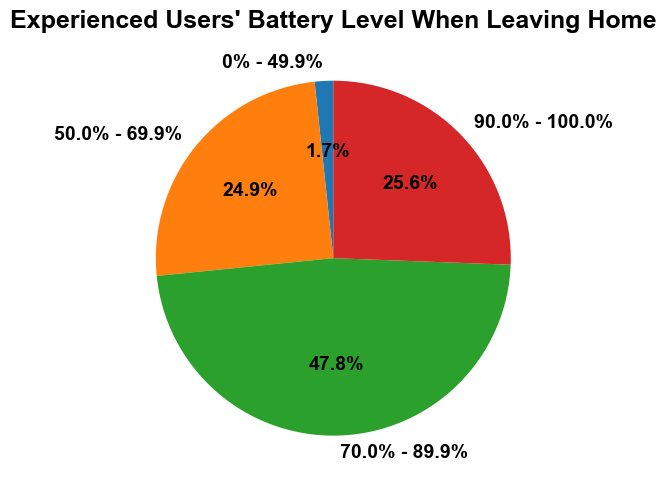

In [55]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Battery_Level_Out']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title("Experienced Users' Battery Level When Leaving Home", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Experienced User Battery_Level_Out.png",
           dpi = 900)

Battery_Level_Charge  0% - 19.9%  20.0% - 39.9%  40.0% - 59.9%  60.0% - 100.0%
EVExp                                                                         
Have EV Experience            18             91             93              95


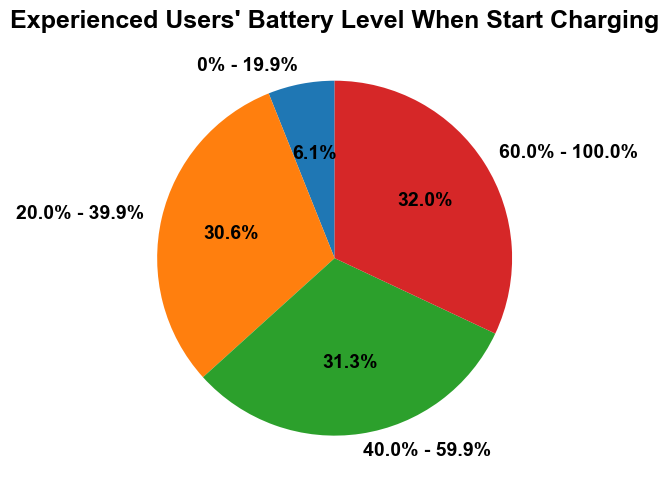

In [56]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Battery_Level_Charge']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title("Experienced Users' Battery Level When Start Charging", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Experienced User Battery_Level_Charge.png",
           dpi = 900)

C:\Users\kenny\AppData\Local\Temp\ipykernel_16884\982607028.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


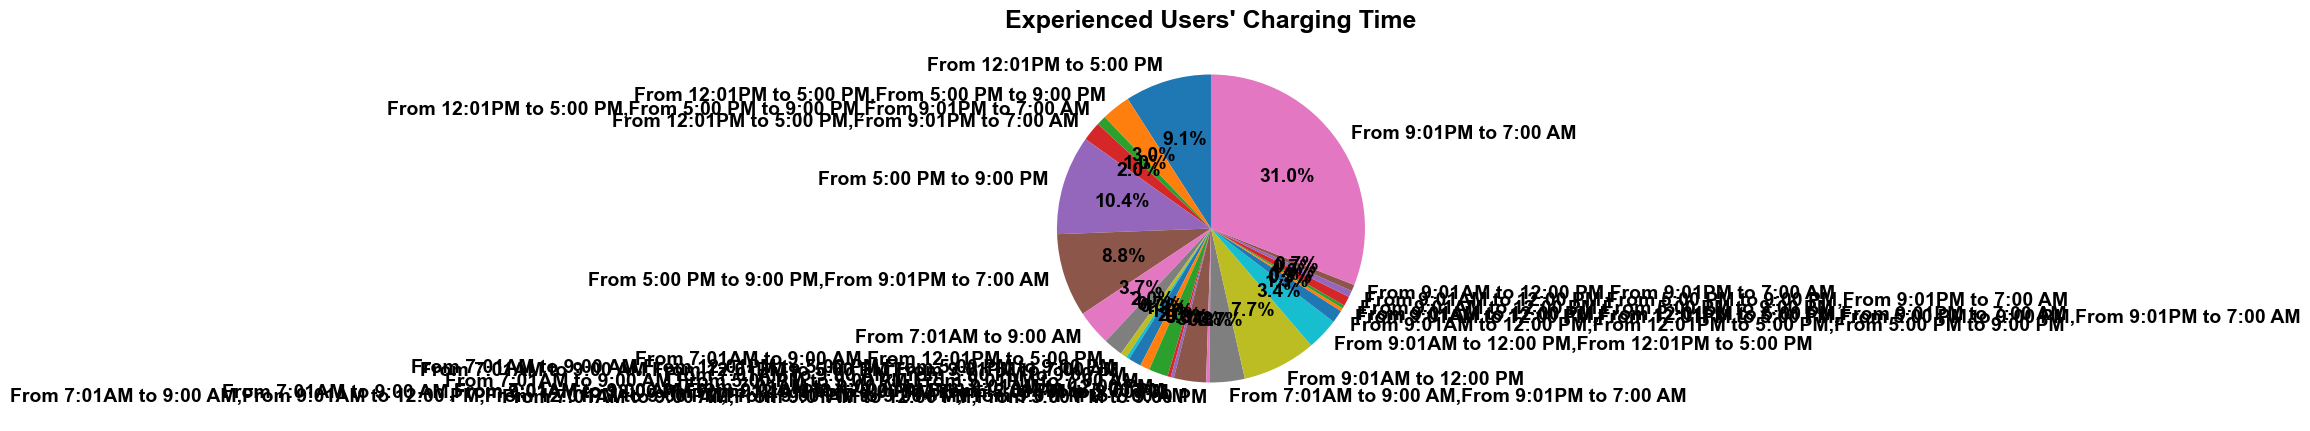

In [57]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Charge_Time']).size().unstack(fill_value=0)
# print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title("Experienced Users' Charging Time", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
# plt.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Experienced User Charge_Time.png",
#            dpi = 1500)

Level1_Duration     0 - 14.9 minutes  1 - 3 hours  15 - 29.9 minutes  \
EVExp                                                                  
Have EV Experience                21           86                 24   

Level1_Duration     30 - 59.9 minutes  I don't charge here  I don't know  \
EVExp                                                                      
Have EV Experience                 38                   17             9   

Level1_Duration     More than 3 hours  
EVExp                                  
Have EV Experience                101  


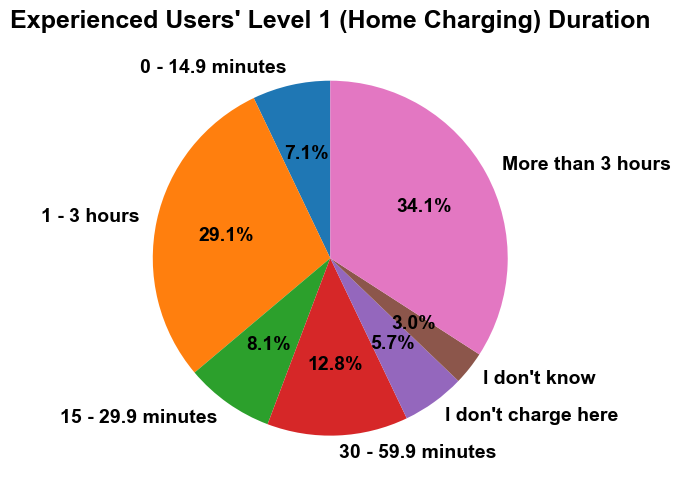

In [58]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Level1_Duration']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title("Experienced Users' Level 1 (Home Charging) Duration", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Experienced User Level_Duration.png",
           dpi = 900)

Level2_Duration     0 - 14.9 minutes  1 - 3 hours  15 - 29.9 minutes  \
EVExp                                                                  
Have EV Experience                19           65                 42   

Level2_Duration     30 - 59.9 minutes  I don't charge here  I don't know  \
EVExp                                                                      
Have EV Experience                 74                   46            15   

Level2_Duration     More than 3 hours  
EVExp                                  
Have EV Experience                 25  


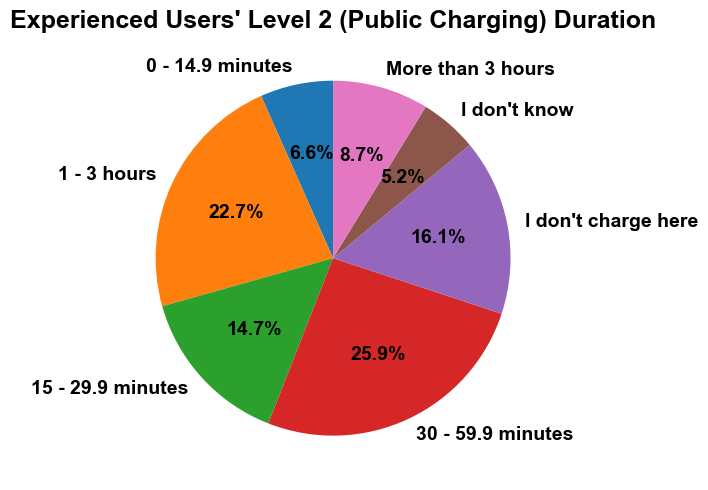

In [59]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Level2_Duration']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title("Experienced Users' Level 2 (Public Charging) Duration", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Experienced User Leve2_Duration.png",
           dpi = 900)

Level3_Duration     0 - 14.9 minutes  1 - 3 hours  15 - 29.9 minutes  \
EVExp                                                                  
Have EV Experience                29           40                 66   

Level3_Duration     30 - 59.9 minutes  I don't charge here  I don't know  \
EVExp                                                                      
Have EV Experience                 62                   49            14   

Level3_Duration     More than 3 hours  
EVExp                                  
Have EV Experience                 25  


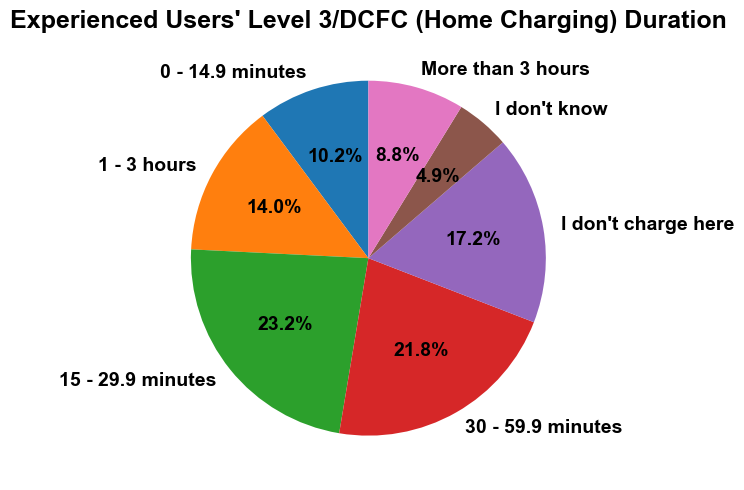

In [60]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Level3_Duration']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title("Experienced Users' Level 3/DCFC (Home Charging) Duration", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Experienced User Leve3_Duration.png",
           dpi = 900)

Walk_Will_Exp       0 - 3 minutes  3 - 7 minutes  7 - 10 minutes  \
EVExp                                                              
Have EV Experience             57            112              73   

Walk_Will_Exp       More than 10 minutes  
EVExp                                     
Have EV Experience                    51  


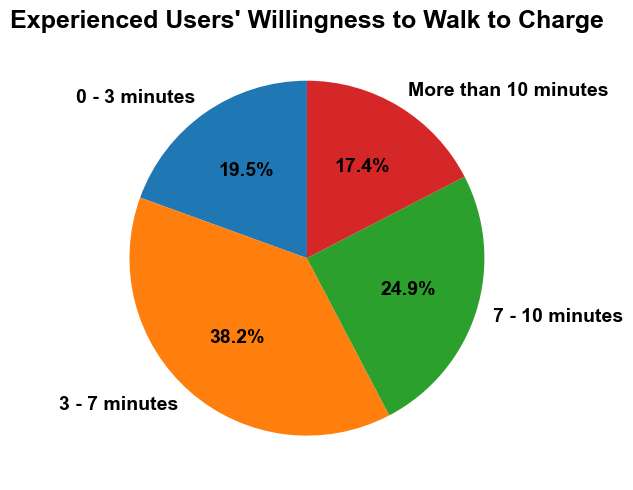

In [61]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Walk_Will_Exp']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title("Experienced Users' Willingness to Walk to Charge", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Experienced User Walk_Will_Exp.png",
           dpi = 900)

Walk_Will_No-Exp    0 - 3 minutes  3 - 7 minutes  7 - 10 minutes  \
EVExp                                                              
Have EV Experience             13             22              16   
No EV Experience              856            491             227   

Walk_Will_No-Exp    More than 10 minutes  
EVExp                                     
Have EV Experience                     6  
No EV Experience                     111  


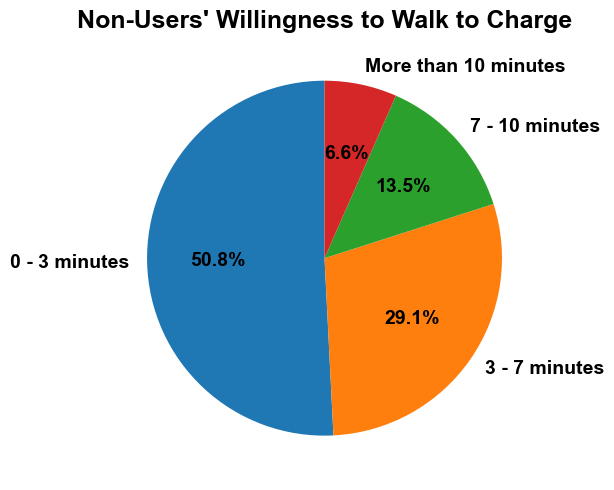

In [62]:
plot_df = charging_data.groupby(['EVExp', 'Walk_Will_No-Exp']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title("Non-Users' Willingness to Walk to Charge", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Non-Users Walk_Will_Exp_non.png",
           dpi = 900)

Battery_Equal_Start  About half the time  Always  Most of the time  Never  \
EVExp                                                                       
Have EV Experience                    67      66                71     33   

Battery_Equal_Start  Sometimes  
EVExp                           
Have EV Experience          60  


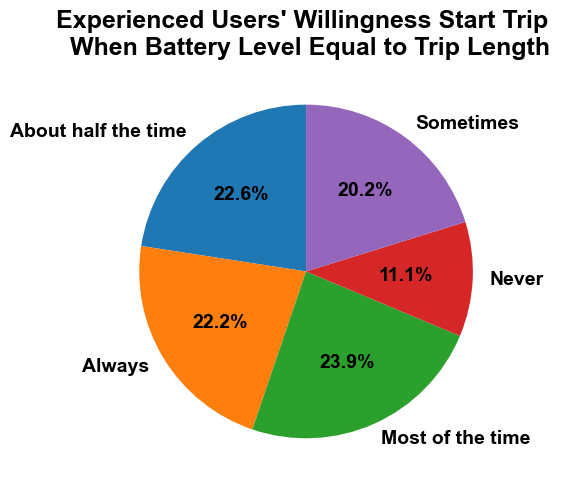

In [63]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Battery_Equal_Start']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title("Experienced Users' Willingness Start Trip \n When Battery Level Equal to Trip Length", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Experienced User Battery_Equal_Start.png",
           dpi = 900)

Battery_Equal_Start_non  About half the time  Always  Most of the time  Never  \
EVExp                                                                           
Have EV Experience                        20       5                15      4   
No EV Experience                         397      92               297    454   

Battery_Equal_Start_non  Sometimes  
EVExp                               
Have EV Experience              13  
No EV Experience               450  


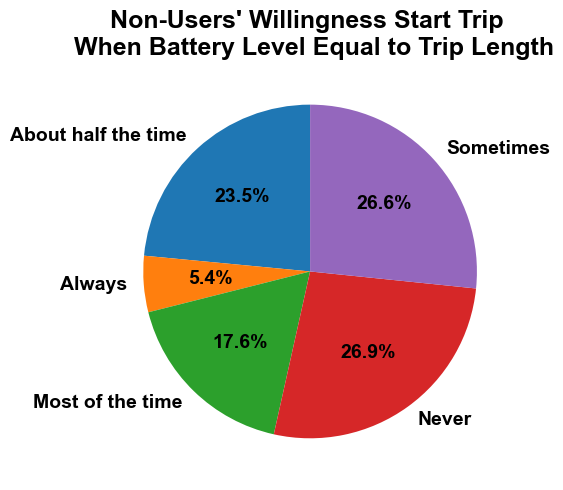

In [64]:
plot_df = charging_data.groupby(['EVExp', 'Battery_Equal_Start_non']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title("Non-Users' Willingness Start Trip \n When Battery Level Equal to Trip Length", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Non-Users Battery_Equal_Start_non.png",
           dpi = 900)

Battery_High_Unfam  About half the time  Always  Most of the time  Never  \
EVExp                                                                      
Have EV Experience                   36     111               101     11   

Battery_High_Unfam  Sometimes  
EVExp                          
Have EV Experience         38  


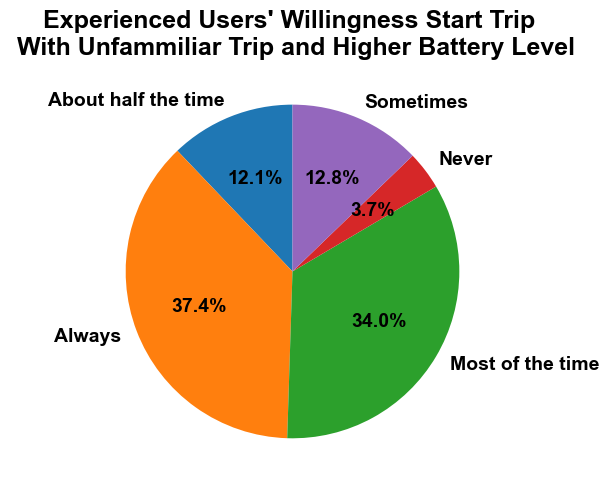

In [65]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Battery_High_Unfam']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title("Experienced Users' Willingness Start Trip \n With Unfammiliar Trip and Higher Battery Level", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Experienced User Battery_High_Unfam.png",
           dpi = 900)

Battery_High_Unfam_non  About half the time  Always  Most of the time  Never  \
EVExp                                                                          
Have EV Experience                       11      18                19      1   
No EV Experience                        166     839               408    165   

Battery_High_Unfam_non  Sometimes  
EVExp                              
Have EV Experience              8  
No EV Experience              112  


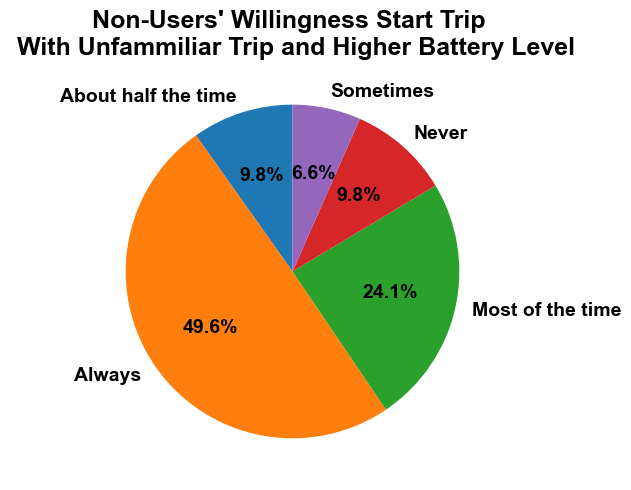

In [66]:
plot_df = charging_data.groupby(['EVExp', 'Battery_High_Unfam_non']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title("Non-Users' Willingness Start Trip \n With Unfammiliar Trip and Higher Battery Level", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Non-Users Battery_High_Unfam_non.png",
           dpi = 900)

Reliable_to_Charge  About half of time  Always  Most of the time  Never  \
EVExp                                                                     
Have EV Experience                  32      74               106      3   

Reliable_to_Charge  Sometimes  
EVExp                          
Have EV Experience         30  


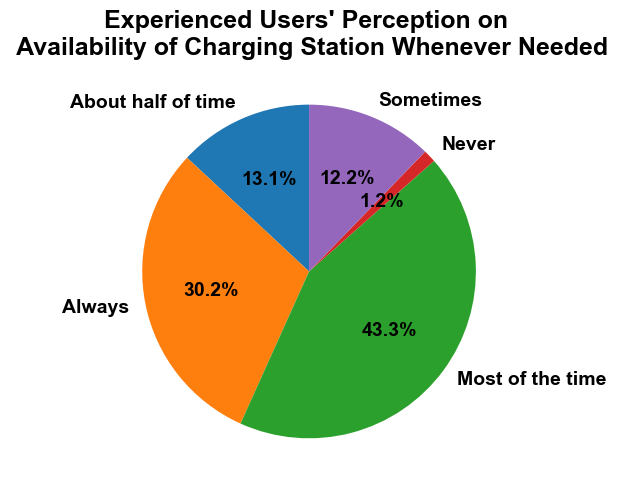

In [67]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'Reliable_to_Charge']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title("Experienced Users' Perception on \n Availability of Charging Station Whenever Needed", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Experienced User Reliable_to_Charge.png",
           dpi = 900)

Reliable_to_Charge_non  About half of time  Always  Most of the time  Never  \
EVExp                                                                         
Have EV Experience                      15       9                14      4   
No EV Experience                       340     140               256    298   

Reliable_to_Charge_non  Sometimes  
EVExp                              
Have EV Experience              7  
No EV Experience              500  


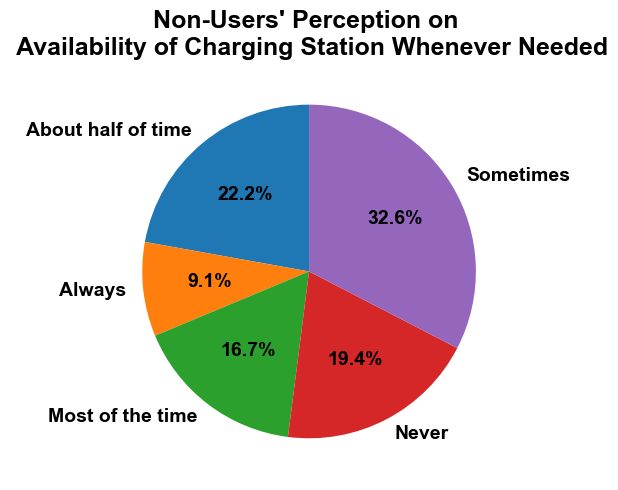

In [68]:
plot_df = charging_data.groupby(['EVExp', 'Reliable_to_Charge_non']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Plot for 'Have EV Experience'
axes.pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes.set_title("Non-Users' Perception on \n Availability of Charging Station Whenever Needed", fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\Non-Users Reliable_to_Charge_non.png",
           dpi = 900)

PubChar_Max_Dist    10 miles  100 miles  30 miles  50 miles  \
EVExp                                                         
Have EV Experience        45         46        80       100   
No EV Experience         634        137       382       324   

PubChar_Max_Dist    More than 100 miles  
EVExp                                    
Have EV Experience                   23  
No EV Experience                     56  


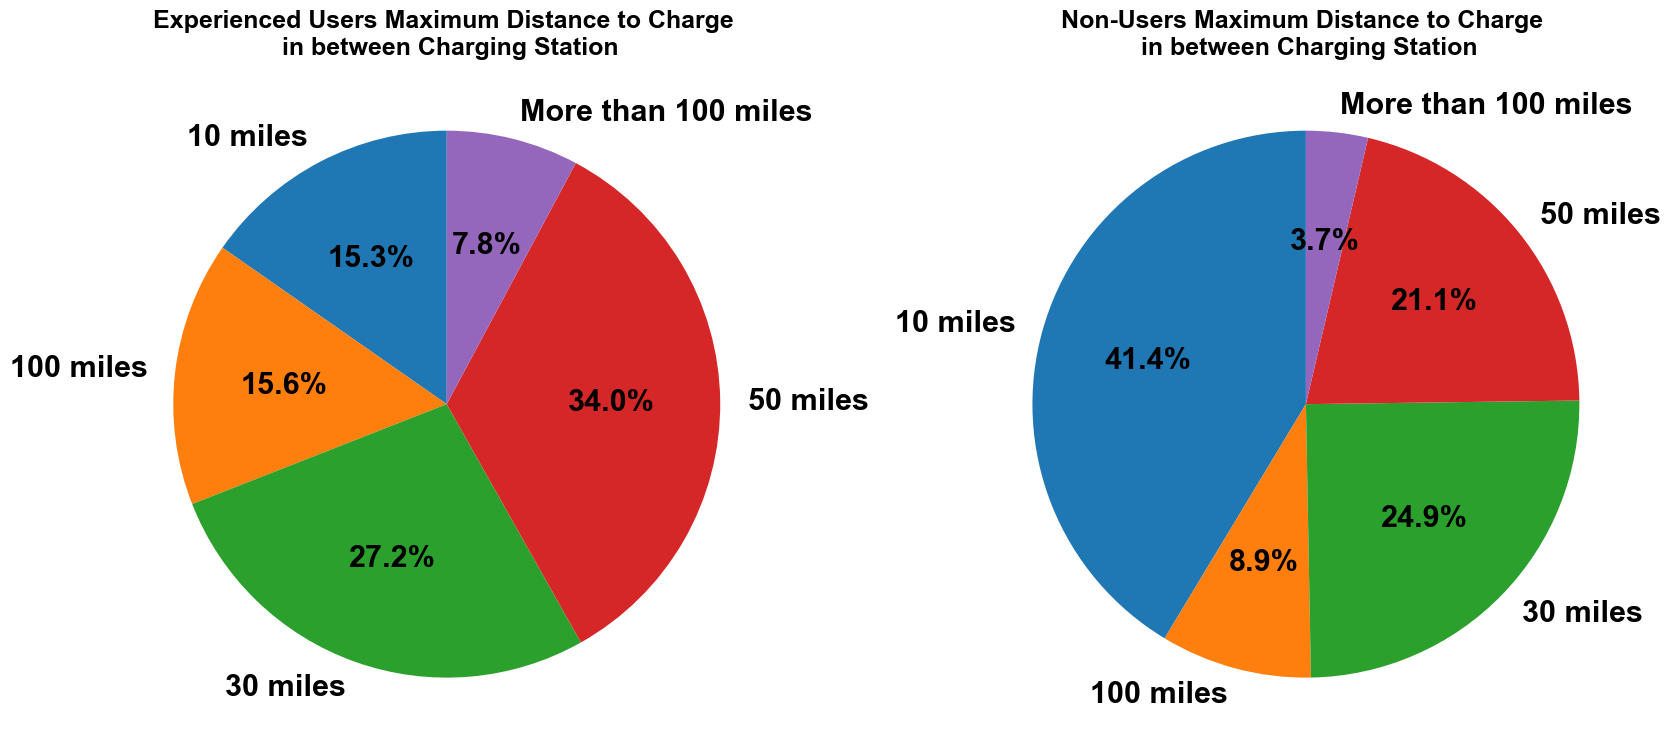

In [69]:
# Count number Charging Technology Awareness based on respondent EV experiences
plot_df = charging_data.groupby(['EVExp', 'PubChar_Max_Dist']).size().unstack(fill_value=0)
print(plot_df)

# Get labels for the bars
labels = plot_df.columns  # This will get each unique value of 'Home_Charging_Avail' after unstack

# Get values for each group
values_have_exp = plot_df.loc['Have EV Experience']
values_no_exp = plot_df.loc['No EV Experience']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 10))

# Plot for 'Have EV Experience'
axes[0].pie(values_have_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[0].set_title('Experienced Users Maximum Distance to Charge \n in between Charging Station', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Plot for 'No EV Experience'
axes[1].pie(values_no_exp, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'arial'}, startangle=90)
axes[1].set_title('Non-Users Maximum Distance to Charge \n in between Charging Station', fontdict={'fontsize': 18, 'fontweight': 'bold', 'fontfamily': 'arial'})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# save figure
fig.savefig(r"C:\Users\kenny\Box\SPR 4706 Survey Data\Kenny\Descriptive Analysis\Charging Knowledge Experience\EV Experience vs PubChar_Max_Dist.png",
           dpi = 900)

In [5]:
df_exp = df[df['EVExp'] == 'Have EV Experience']
df_noexp = df[df['EVExp'] == 'No EV Experience']

print('Number of Experience Respondents: {}'.format(str(int(df_exp.shape[0]/6))))
print('Number of Experience Respondents: {}'.format(str(int(df_noexp.shape[0]/6))))

Number of Experience Respondents: 203
Number of Experience Respondents: 1008


In [25]:
columns_to_summarize = df.columns.values[np.concatenate((np.arange(1,4),np.arange(7,10)))]
# Convert columns to categorical
# df_exp[[columns_to_summarize]] = df_exp[columns_to_summarize].astype('category')
# df_noexp[[columns_to_summarize]] = df_noexp[columns_to_summarize].astype('category')
for i, col in enumerate(columns_to_summarize):
    # Get count of each category
    count_exp = df_exp[col].value_counts()
    count_noexp = df_noexp[col].value_counts()
    

    # Get percentage of each category
    percentage_exp = (count_exp / len(df_exp[col])* 100).round(1)
    percentage_noexp = (count_noexp / len(df_noexp[col])* 100).round(1)
    print('Experience Users: ')
    print (count_exp/6)
    print (percentage_exp)
    
    print('Non-Experience Users: ')
    print (count_noexp/6)
    print (percentage_noexp)
    
#     count_exp_keys = count_exp.keys().tolist()
#     count_exp_vals = count_exp.tolist()
    
#     df_count_exp = pd.DataFrame({col: count_exp_keys,
#                                 'count': count_exp_vals})
    
#     percentage_exp_keys = percentage_exp.keys().tolist()
#     percentage_exp_vals = percentage_exp.tolist()
    
#     df_percentage_exp = pd.DataFrame({col: percentage_exp_keys,
#                                     'percentage': percentage_exp_vals})
    
#     if i == 0:
#         summary_exp = pd.merge(df_count_exp, df_percentage_exp, on = col, how ='outer')
#     else:
#         summary_exp = pd.merge(summary_exp, df_count_exp, left_on=columns_to_summarize[i-1], right_on=col, how='outer')
#         summary_exp = pd.merge(summary_exp, df_percentage_exp, left_on=columns_to_summarize[i-1], right_on=col, how='outer')
        
#         summary_exp = summary_exp.drop(columns = col)
        
print(summary_exp)
# # Flatten the count and percentage DataFrames
# count_exp = count_exp.unstack().reset_index()
# percentage_exp = percentage_exp.unstack().reset_index()
# count_noexp = count_exp.unstack().reset_index()
# percentage_noexp = percentage_exp.unstack().reset_index()

# # Rename columns
# count_exp.columns = ['Value', 'Count']
# percentage_exp.columns = ['Value', 'Percentage']
# count_noexp.columns = ['Value', 'Count']
# percentage_noexp.columns = ['Value', 'Percentage']

# # Create a summary DataFrame
# summary_df_exp = pd.concat([count_exp['Value'], count_exp['Count'], percentage_exp['Percentage']], axis=1)
# summary_df_noexp = pd.concat([count_noexp['Value'], count_noexp['Count'], percentage_noexp['Percentage']], axis=1)

# print(summary_df_exp)
# print(summary_df_noexp)

# summary_df_exp.to_excel('exp_descstats.xlsx')
# summary_df_noexp.to_excel('noexp_descstats.xlsx')

Experience Users: 
25-34      55.0
35-44      55.0
45-54      32.0
55-64      25.0
18-24      18.0
Over 65    18.0
Name: Age, dtype: float64
25-34      27.1
35-44      27.1
45-54      15.8
55-64      12.3
18-24       8.9
Over 65     8.9
Name: Age, dtype: float64
Non-Experience Users: 
Over 65    248.0
35-44      208.0
25-34      207.0
55-64      143.0
45-54      139.0
18-24       63.0
Name: Age, dtype: float64
Over 65    24.6
35-44      20.6
25-34      20.5
55-64      14.2
45-54      13.8
18-24       6.2
Name: Age, dtype: float64
Experience Users: 
Male                 124.0
Female                75.0
Prefer not to say      4.0
Name: Gender, dtype: float64
Male                 61.1
Female               36.9
Prefer not to say     2.0
Name: Gender, dtype: float64
Non-Experience Users: 
Female                       508.0
Male                         487.0
Non-binary / third gender      8.0
Prefer not to say              5.0
Name: Gender, dtype: float64
Female                       50.4
Ma

In [7]:
df_exp[columns_to_summarize].value_counts()

Age    Gender  Income               Ethnic        Education                        Occupation        
35-44  Male    $75,000 - $99,999    Non-hispanic  Graduate or professional school  Employed full-time    36
               $100,000 - $149,999  Non-hispanic  Graduate or professional school  Employed full-time    36
45-54  Male    $150,000 or more     Non-hispanic  College graduate                 Employed full-time    36
35-44  Male    $150,000 or more     Non-hispanic  Graduate or professional school  Employed full-time    30
55-64  Male    $150,000 or more     Non-hispanic  College graduate                 Employed full-time    30
                                                                                                         ..
25-34  Male    $150,000 or more     Hispanic      College graduate                 Employed full-time     6
       Female  Under $25,000        Non-hispanic  Some college                     Employed full-time     6
                                  